In [13]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler

colors =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 'darkslategray', 'olive', '#9467bd', '#8c564b', '#e377c2', 'indigo', '#7f7f7f', '#bcbd22', '#17becf', 'tan', 'saddlebrown', 'darkgreen']
# Set the color cycle
plt.rc('axes', prop_cycle=(cycler('color', colors)))

# Dictionary to store the loaded arrays
L = 4
N = L*L
periodic = False
model = "2DTFIM"

if model == "2DXXZ":
    int_ = "delta"
    params = [1.2, 1.05, 1., 0.95, 0.8, 0.2,-0.2, -0.8, -0.95, -1.0, -1.05, -1.2]  #sigmaz interaction
elif model == "2DJ1J2":
    int_ = "J2"
    params = [0.2, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.8, 1.0, 1.05, 1.2] #J2
elif model == "2DTFIM":
    int_ = "B"
    params =  [0, -0.5, -1.0, -1.2, -1.4, -1.6, -1.8, -2.0, -2.5, -4.0] #magnetic field

cmi = {}
mean_corr= {}
var_corr = {}
gap = {}
cmi_traceout = {}
mag = {}
# Looping through the values and loading each file
for param in params:
    filename = f"result/{model}/cmi_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi[param] = np.load(filename)
    cmi[param] = cmi[param][cmi[param]>1e-13]
    filename = f"result/{model}/mean_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mean_corr[param] = np.load(filename)
    filename = f"result/{model}/var_corr_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    var_corr[param] = np.load(filename)
    var_corr[param] = var_corr[param][mean_corr[param]>1e-13]
    mean_corr[param] = mean_corr[param][mean_corr[param]>1e-13]

    filename = f"result/{model}/gap_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    gap[param] = np.load(filename)
    filename = f"result/{model}/cmi_traceout_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    cmi_traceout[param] = np.load(filename, allow_pickle=True)
    for j in range(len(cmi_traceout[param])):
        cmi_traceout[param][j] = np.array(cmi_traceout[param][j])[np.array(cmi_traceout[param][j])>1e-13]
    filename = f"result/{model}/mag_{model}_L{L}_{int_}_{param}periodic_{periodic}.npy"
    mag[param] = np.load(filename)


In [11]:
print(cmi_traceout)

{0: array([list([0.4755909873087263, -0.0, -0.0, -0.0, -0.0, -0.0]),
       list([0.4755909873087263, -0.0, -0.0, -0.0, -0.0]),
       list([0.4755909873087263, -0.0, -0.0, -0.0, -0.0]),
       list([0.4755909873087263, -0.0, -0.0, -0.0, -0.0, -0.0]),
       list([0.4755909873087263, -0.0, -0.0, -0.0, -0.0]),
       list([0.4755909873087263, -0.0, -0.0, -0.0]),
       list([0.4755909873087263, -0.0, -0.0, -0.0]),
       list([0.4755909873087263, -0.0, -0.0, -0.0, -0.0])], dtype=object), -0.5: array([list([0.6125401320549482, 0.007700031570813226, 1.9773848771498237e-05, 7.251014633169461e-08, 1.1794925036667792e-09, 5.360267785192718e-11]),
       list([0.6502219711924715, 0.006553324868253885, 5.651490172398077e-06, 1.2695957618547027e-08, 2.1321344689795296e-10]),
       list([0.6503012220495428, 0.008674980951011824, 2.2809071576812556e-05, 3.910853063615605e-08, 7.911338251176403e-10]),
       list([0.6124296968990386, 0.026361751588048876, 0.000663131245964399, 6.096982510084281e-

In [14]:
cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[] for i in range (len(params))]
err_cmi_length_traceout = [[] for i in range (len(params))]
for i in params:
    df = len(cmi[i])-2
    if df>=1:
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i])), -np.log(cmi[i]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i])) - mean_x)**2))
        cmi_length.append(1/cmi_len)
        err_cmi_length.append(1/cmi_len**2*err)

    df = len(mean_corr[i])-2
    if df >=1:
        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i])), -np.log(np.abs(mean_corr[i])), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i])) - mean_x)**2))
        corre_length.append(1/corr_len)
        err_corre_length.append(1/corr_len**2*err)

    for j in range(len(cmi_traceout[i])):
        df = len(cmi_traceout[i][j])-2
        if df>=1:
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i][j])), -np.log(cmi_traceout[i][j]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i][j])) - mean_x)**2))
            cmi_length_traceout[params.index(i)].append(cmi_len)
            err_cmi_length_traceout[params.index(i)].append(err)




In [23]:
print(err_corre_length)
print(corre_length)

[array([7.77411012]), array([9.58514534]), array([25.60779719]), array([87.55548665]), array([1327.36345812]), array([15.53165751]), array([1.86376828]), array([0.23809203]), array([0.11940527]), array([0.04792595])]
[-13.465153714963611, -15.155036633609177, -25.995177178329143, -49.81994446418631, 204.87500644638175, 24.3793967365493, 10.284710560967506, 5.582186101140818, 2.3499295555250446, 1.0387628218534948]


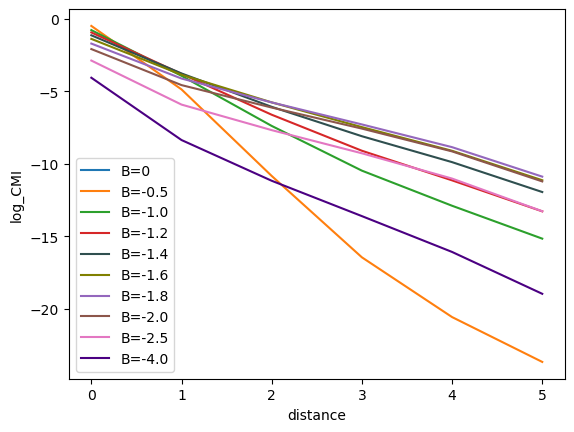

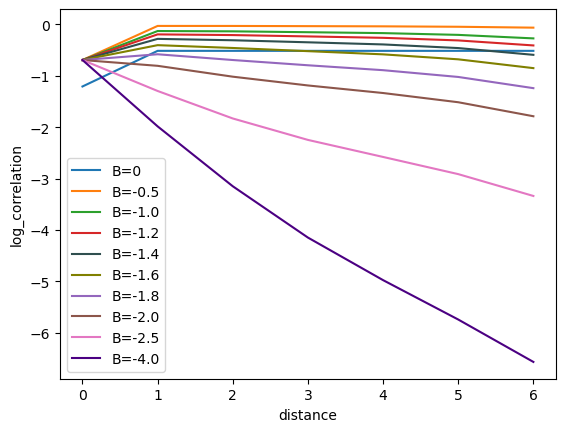

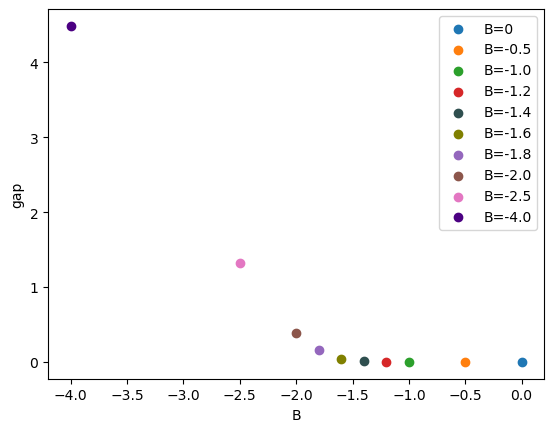

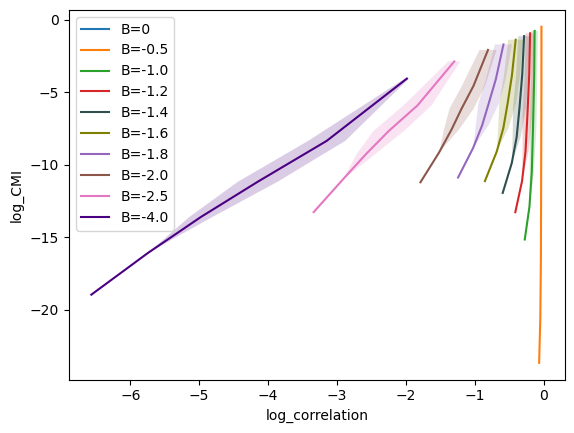

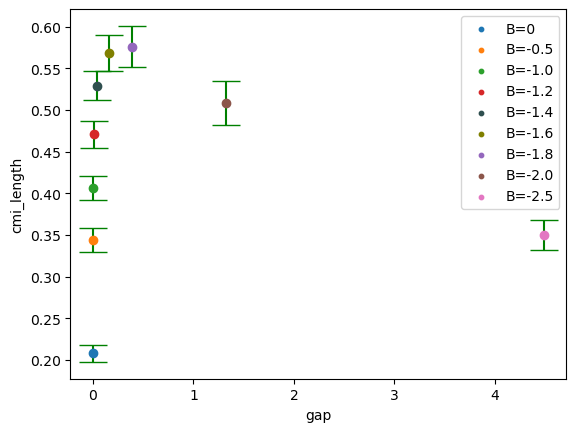

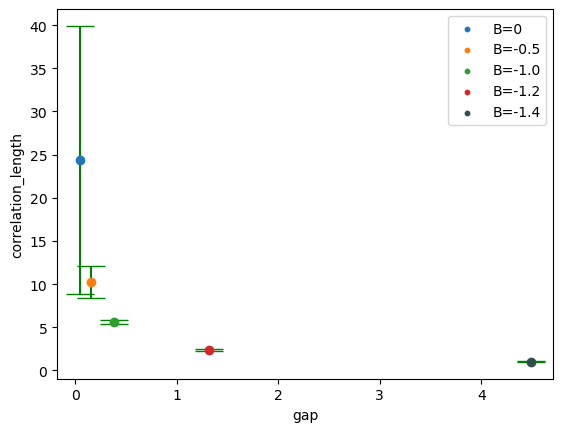

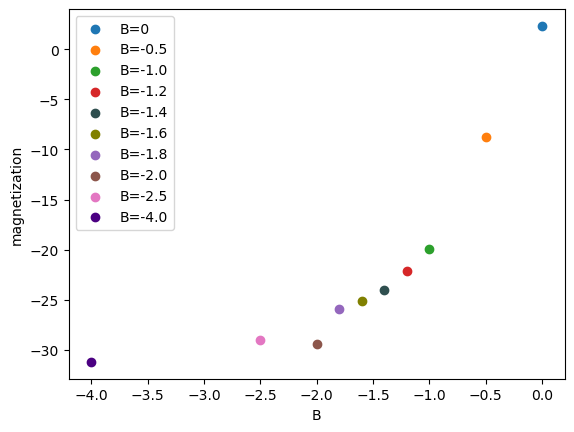

In [32]:
for i in params:
    if len(cmi[i]>=3):  #so that meaningful error can be got
        plt.plot(np.log(cmi[i]), label= int_+"="+str(i))
plt.xlabel("distance")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    if len(mean_corr[i]>=3):  #so that meaningful error can be got
        plt.plot(np.log(np.abs(mean_corr[i])), label=int_+"="+str(i))
    #plt.fill_between(np.arange(len(mean_corr[i])) ,np.log(np.abs(mean_corr[i])) - 1/mean_corr[i]*np.sqrt(var_corr[i]) , np.log(np.abs(mean_corr[i])) + 1/np.abs(mean_corr[i])*np.sqrt(var_corr[i]), alpha=0.2)
plt.xlabel("distance")
plt.ylabel("log_correlation")
plt.legend()
plt.savefig("figure/"+model+"/correlation_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    plt.scatter(i, gap[i], label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("gap")
plt.legend()
plt.savefig("figure/"+model+"/gap_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

for i in params:
    length = min(len(cmi[i]), len(mean_corr[i]))
    mean_corr[i] = np.abs(mean_corr[i])
    plt.plot(np.log(mean_corr[i][1:length+1]), np.log(cmi[i][:length]), label= int_ + "=" + str(i))
    if periodic == False:
        plt.fill_betweenx(np.log(cmi[i][:length]),
                          np.log(mean_corr[i][1:length+1]) - 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]),
                          np.log(mean_corr[i][1:length+1]) + 1 / mean_corr[i][1:length+1] * np.sqrt(var_corr[i][1:length+1]), alpha=0.2)
plt.xlabel("log_correlation")
plt.ylabel("log_CMI")
plt.legend()
plt.savefig("figure/"+model+"/correlation_cmi_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()


gap_list = []
for i in params:
    if len(cmi[i])>=3:
        gap_list.append(gap[i])
for i,j in zip(params, range(len(gap_list))):
    plt.scatter(gap_list[j], cmi_length[j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], cmi_length[j], yerr=err_cmi_length[j][0], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("cmi_length")
plt.legend()
plt.savefig(
    "figure/"+model+"/cmi_length_gap_"+model+"_L" + str(L) +  "_" + "periodic_" + str(periodic) + ".png")
plt.show()
plt.clf()

gap_list = []
for i in params:
    if len(mean_corr[i])>=3 and corre_length[params.index(i)]>0 and corre_length[params.index(i)]<100:
        gap_list.append(gap[i])
for i,j in zip(params, range(len(gap_list))):
    plt.scatter(gap_list[j], np.array(corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100)][j], label= int_ +"=" + str(i), s=10)
    plt.errorbar(gap_list[j], np.array(corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100) ][j], yerr=np.array(err_corre_length)[(np.array(corre_length)>0) & (np.array(corre_length)<100), 0][j], fmt='o', ecolor='g', capthick=1, capsize=10)
plt.xlabel("gap")
plt.ylabel("correlation_length")
plt.legend()
plt.savefig("figure/"+model+"/correlation_length_gap_"+model+"_L" + str(L) +  "_"+ "periodic_" + str(
    periodic) + ".png")
plt.show()
plt.clf()

for i in params:
    mag[i] = np.abs(mag[i])
    plt.scatter(i, np.log(mag[i]), label=int_+"="+str(i))
plt.xlabel(int_)
plt.ylabel("magnetization")
plt.legend()
plt.savefig("figure/"+model+"/mag_"+model+"_L"+str(L)+"_periodic_"+str(periodic)+".png")
plt.show()

0
[]
1
[4.813707074338091, 5.683077119449982, 5.336408181560542, 4.058149407698012, 4.648335099706452, 5.623801658790241, 4.926828613495265, 3.2715981678898003]


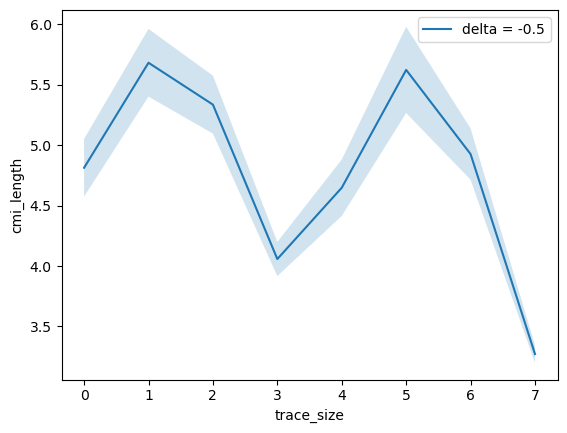

2
[2.9091688946677414, 3.447484574143856, 3.2925109377660147, 2.549424295722611, 2.974295490412665, 3.577974264098265, 3.161628621175215, 2.134971685300205]


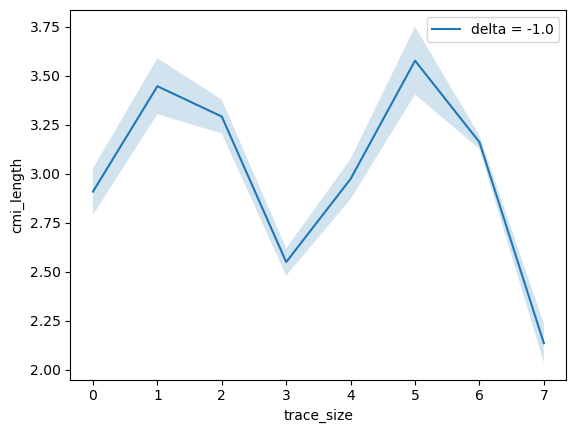

3
[2.4612798539270817, 2.9231868324575334, 2.804571291713162, 2.1907223113475154, 2.576693324176522, 3.104907795089739, 2.7488342380170776, 1.8835119043546846]


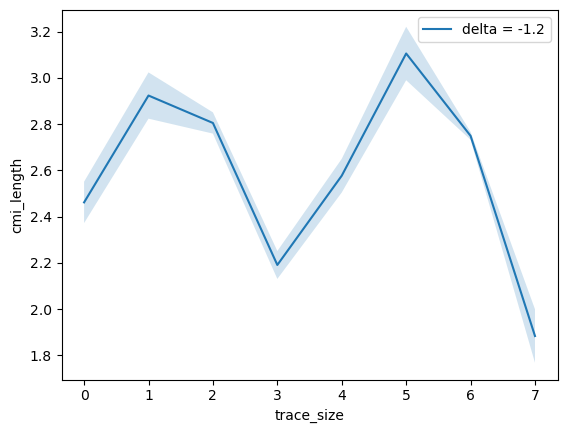

4
[2.1252451596178448, 2.5287881507960472, 2.4335953425016204, 1.9151716582569647, 2.275018830073796, 2.750382684589728, 2.4407277436554295, 1.7006679954706347]


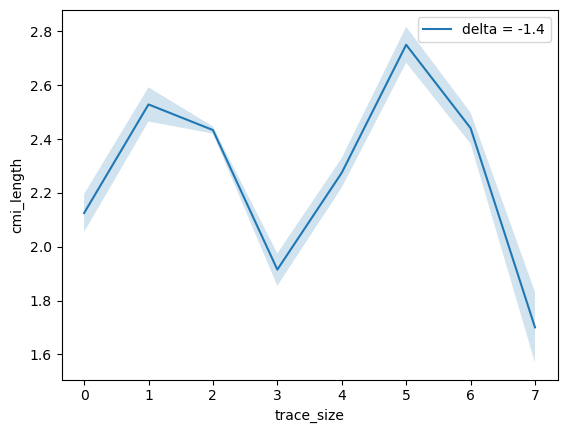

5
[1.889731944280462, 2.2514520032790837, 2.1689436709252967, 1.7162138114380008, 2.06004183687715, 2.500345965849484, 2.2229564703066127, 1.5753635735645604]


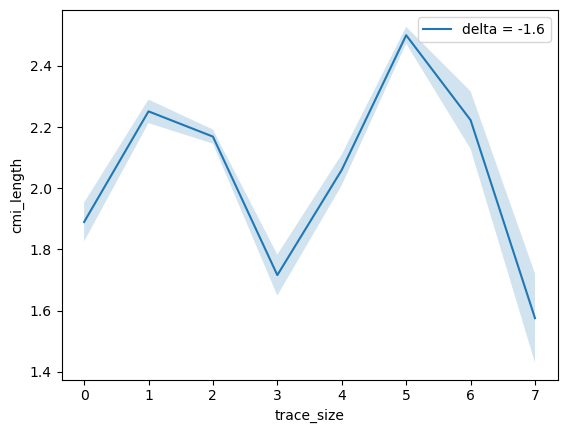

6
[1.7590455406724457, 2.0952521455016515, 2.016059135315975, 1.601449788258094, 1.9400367056669043, 2.3602925536594497, 2.0962013172966625, 1.5081902203038406]


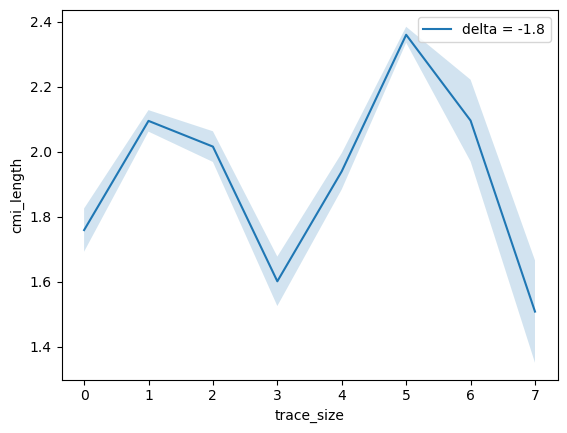

7
[1.736285264639222, 2.0613119597807414, 1.9775678848098368, 1.57865594237143, 1.9238015990198603, 2.3350589487191553, 2.0660286782098924, 1.50793177287312]


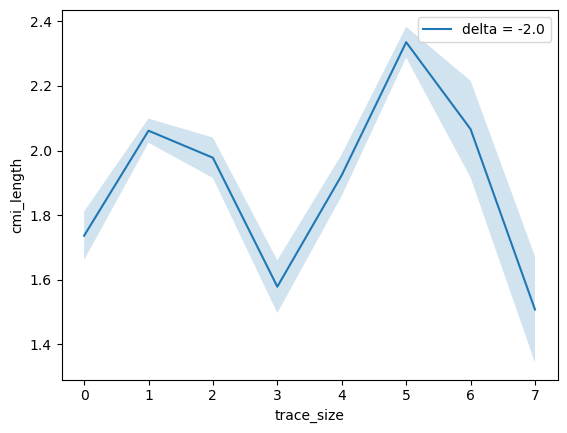

8
[1.9663437809346076, 2.294709335134526, 2.1866881075685085, 1.7890633704157946, 2.1708582808571824, 2.574449647632491, 2.2689415168564975, 1.738226450511466]


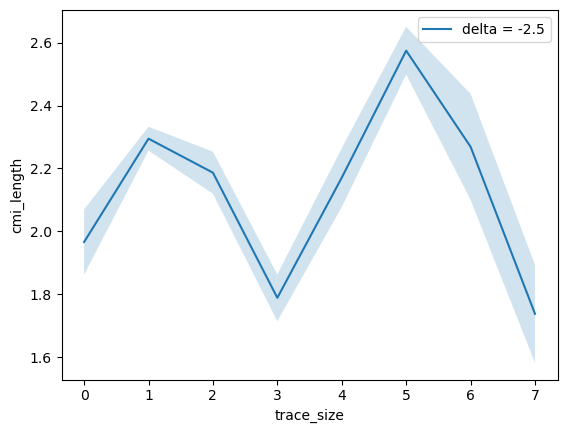

9
[2.8582445054406915, 3.216319014962656, 3.0636357637214435, 2.6580346436837465, 3.1057125152102873, 3.492016801387689, 3.1353651217965712, 2.6621222214409714]


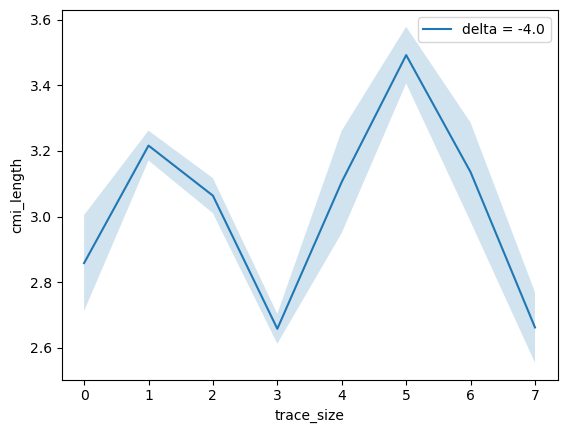

<Figure size 640x480 with 0 Axes>

In [38]:
for i in range(len(params)):
    print(i)
    print(cmi_length_traceout[i])
    if len(cmi_length_traceout[i])>=3:
        cmi_length_traceout[i] = np.array(cmi_length_traceout[i])
        err_cmi_length_traceout[i] = np.array(err_cmi_length_traceout[i]).ravel()
        plt.plot(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i], label="delta = " + str(params[i]))
        plt.fill_between(np.arange(len(cmi_length_traceout[i])), cmi_length_traceout[i] - err_cmi_length_traceout[i],
                         cmi_length_traceout[i] + err_cmi_length_traceout[i], alpha=0.2)
        plt.xlabel("trace_size")
        plt.ylabel("cmi_length")
        plt.legend()
        plt.savefig(
            "figure/"+model+"/traceout/cmi_length_traceout_"+model+"_L" + str(L) +"_"+int_+"_" + str(params[i]) + "periodic_" + str(
                periodic) + ".png")
        plt.show()
        plt.clf()